## 6. Result comparisons

Ok, now we comapre which model performes best.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
my_bucket_name = "s3:[my bucket name]"

In [91]:
gluonts_forecasts_path_name = f"{my_bucket_name}/nyc-taxi-trip-data-to-fit/gluonts_forecasts.csv"
forecast_df_path_name = f"{my_bucket_name}/nyc-taxi-trip-data-to-fit/forecast_forecasts.csv"
forecast_holy_weath_df_path_name = f"{my_bucket_name}/nyc-taxi-trip-data-to-fit/forecast_forecasts_holy_weath.csv"
test_name = f"{my_bucket_name}/nyc-taxi-trip-data-to-fit/forecast_test_data.csv"

In [92]:
gluonts = pd.read_csv(gluonts_forecasts_path_name, index_col=0)
forecast = pd.read_csv(forecast_df_path_name, index_col=0)
forecast_holy_weath = pd.read_csv(forecast_holy_weath_df_path_name, index_col=0)
test = pd.read_csv(test_name, index_col=0)

In [150]:
gluonts

,237,236,161,186,162,132,142,170,230,48
2022-11-01 00:00:00,34.809460,15.842801,33.299797,65.244160,35.747818,239.130020,46.511070,33.772170,64.304650,81.296265
2022-11-01 01:00:00,14.965312,6.592892,14.546860,32.887394,21.475422,82.840800,17.045430,22.718653,32.523020,48.608900
2022-11-01 02:00:00,9.366215,7.643106,8.799880,24.889177,10.818439,32.856083,8.333202,15.762423,18.187626,38.497880
2022-11-01 03:00:00,7.453127,7.810939,9.308111,14.136225,8.824555,12.777963,6.998076,11.138103,17.615610,33.232900
2022-11-01 04:00:00,9.080372,9.608572,11.468083,18.902397,11.425080,11.402898,8.569851,11.035521,23.387745,31.825277
...,...,...,...,...,...,...,...,...,...,...
2022-11-07 19:00:00,356.398470,316.181700,367.260440,233.207200,301.634520,421.960630,270.670650,213.271470,248.810270,196.222050
2022-11-07 20:00:00,311.366580,240.041400,305.519960,209.105700,268.455500,466.953160,256.902470,193.129210,220.614330,190.536590
2022-11-07 21:00:00,277.283780,170.297740,228.512370,188.565570,230.651400,429.760530,245.728800,160.011920,207.818040,187.414600
2022-11-07 22:00:00,169.601400,99.898926,185.266310,146.400700,143.541140,456.178300,195.671600,117.264730,181.331990,174.378390


In [151]:
forecast

,48,132,142,161,162,170,186,230,236,237
2022-11-01 00:00:00,71.643364,255.045258,41.130394,32.263248,36.853321,32.633579,60.423935,56.973759,12.686796,26.562370
2022-11-01 01:00:00,40.256618,79.447052,13.337586,14.001607,15.805283,15.870247,27.262753,29.716928,4.001360,9.943343
2022-11-01 02:00:00,24.926325,29.508350,4.496655,4.907254,5.755324,8.524384,18.183872,16.319521,1.404699,3.285018
2022-11-01 03:00:00,19.867657,11.183738,2.737319,3.629344,3.810823,4.927877,8.034961,13.007368,1.017969,1.540813
2022-11-01 04:00:00,19.977037,13.379242,3.190955,4.089968,6.274707,4.751756,14.686769,15.997626,2.481797,2.242716
...,...,...,...,...,...,...,...,...,...,...
2022-11-07 19:00:00,163.581604,349.985199,223.096222,363.101074,276.268921,178.790573,206.458893,212.136902,273.415283,307.095886
2022-11-07 20:00:00,162.876343,391.828613,214.689224,285.810669,244.685471,155.370453,195.428284,191.121765,201.348587,276.934235
2022-11-07 21:00:00,157.252518,376.750366,199.094955,204.671768,183.552277,123.543304,167.591034,174.958267,125.242615,224.232758
2022-11-07 22:00:00,140.696960,375.521881,147.355560,128.662750,111.674332,84.986595,124.377090,154.841156,73.055565,127.401527


In [152]:
forecast_holy_weath

,48,132,142,161,162,170,186,230,236,237
2022-11-01 00:00:00,72.595612,244.459122,49.707058,35.952776,37.921234,33.210051,62.607300,66.772232,13.153723,31.912493
2022-11-01 01:00:00,40.169285,78.936234,17.591928,15.962780,18.025534,16.744948,29.619105,32.244357,5.261465,13.389812
2022-11-01 02:00:00,24.465066,33.286057,7.879318,6.994725,7.947175,9.867323,20.999951,17.401927,3.455608,6.224420
2022-11-01 03:00:00,19.592087,17.958334,4.964889,6.326741,5.771610,5.923562,9.475657,13.053819,3.719874,4.588059
2022-11-01 04:00:00,21.714182,18.339912,5.512718,7.140305,8.560440,6.155192,13.539166,18.189836,6.193851,5.304463
...,...,...,...,...,...,...,...,...,...,...
2022-11-07 19:00:00,174.384392,378.393890,241.310738,377.850983,282.969116,196.392113,212.221771,234.788803,339.157013,341.192673
2022-11-07 20:00:00,176.401108,416.211243,233.764648,312.703949,249.452232,170.700714,197.179443,205.749786,261.200806,312.474350
2022-11-07 21:00:00,160.673370,402.577820,218.278885,230.899826,187.450714,139.142643,170.823318,190.717979,182.180557,263.981514
2022-11-07 22:00:00,148.647636,412.272034,168.659485,173.750168,131.896709,109.307144,139.623661,172.902794,109.313286,164.486671


In [153]:
test

,item_id,target_value
timestamp,,
2022-11-01 00:00:00,48,101
2022-11-01 00:00:00,132,165
2022-11-01 00:00:00,142,26
2022-11-01 00:00:00,161,44
2022-11-01 00:00:00,162,29
...,...,...
2022-11-07 23:00:00,170,106
2022-11-07 23:00:00,186,128
2022-11-07 23:00:00,230,169


In [97]:
test[test['item_id']==48]

,item_id,target_value
timestamp,,
2022-11-01 00:00:00,48,101
2022-11-01 01:00:00,48,64
2022-11-01 02:00:00,48,64
2022-11-01 03:00:00,48,38
2022-11-01 04:00:00,48,35
...,...,...
2022-11-07 19:00:00,48,154
2022-11-07 20:00:00,48,157
2022-11-07 21:00:00,48,152


In [98]:
'''
glueonts
{'MSE': 951.628396922765,
 'abs_error': 35937.370585613884,
 'abs_target_sum': 310241.0,
 'abs_target_mean': 184.6672619047619,
 'seasonal_error': 31.60525834476452,
 'MASE': 0.7021201115817057,
 'MAPE': 0.2068002236794746,
 'sMAPE': 0.18247105691295268,
 'MSIS': 4.881204969518122,
 'QuantileLoss[0.1]': 16731.154635207728,
 'Coverage[0.1]': 0.07916666666666666,
 'QuantileLoss[0.5]': 35937.370585613884,
 'Coverage[0.5]': 0.4351190476190476,
 'QuantileLoss[0.9]': 17337.553616046906,
 'Coverage[0.9]': 0.8619047619047618,
 'RMSE': 30.848474790867133,
 'NRMSE': 0.1670489640268591,
 'ND': 0.11583694800369353,
 'wQuantileLoss[0.1]': 0.053929540696451235,
 'wQuantileLoss[0.5]': 0.11583694800369353,
 'wQuantileLoss[0.9]': 0.05588414689240592,
 'mean_absolute_QuantileLoss': 23335.359612289507,
 'mean_wQuantileLoss': 0.07521687853085023,
 'MAE_Coverage': 0.3873015873015873,
 'OWA': nan}
'''

"\nglueonts\n{'MSE': 951.628396922765,\n 'abs_error': 35937.370585613884,\n 'abs_target_sum': 310241.0,\n 'abs_target_mean': 184.6672619047619,\n 'seasonal_error': 31.60525834476452,\n 'MASE': 0.7021201115817057,\n 'MAPE': 0.2068002236794746,\n 'sMAPE': 0.18247105691295268,\n 'MSIS': 4.881204969518122,\n 'QuantileLoss[0.1]': 16731.154635207728,\n 'Coverage[0.1]': 0.07916666666666666,\n 'QuantileLoss[0.5]': 35937.370585613884,\n 'Coverage[0.5]': 0.4351190476190476,\n 'QuantileLoss[0.9]': 17337.553616046906,\n 'Coverage[0.9]': 0.8619047619047618,\n 'RMSE': 30.848474790867133,\n 'NRMSE': 0.1670489640268591,\n 'ND': 0.11583694800369353,\n 'wQuantileLoss[0.1]': 0.053929540696451235,\n 'wQuantileLoss[0.5]': 0.11583694800369353,\n 'wQuantileLoss[0.9]': 0.05588414689240592,\n 'mean_absolute_QuantileLoss': 23335.359612289507,\n 'mean_wQuantileLoss': 0.07521687853085023,\n 'MAE_Coverage': 0.3873015873015873,\n 'OWA': nan}\n"

In [99]:
'''
Forecast
Weighted Quantile Loss (wQL): [
  {
    "Quantile": 0.9,
    "LossValue": 0.053934329183132484
  },
  {
    "Quantile": 0.5,
    "LossValue": 0.11009285499091646
  },
  {
    "Quantile": 0.1,
    "LossValue": 0.04917490676093668
  }
]
Root Mean Square Error (RMSE): 28.386428507059318
Weighted Absolute Percentage Error (WAPE): 0.1092148656913957
Mean Absolute Percentage Error (MAPE): 0.17739598658900052
Mean Absolute Scaled Error (MASE): 0.5562460129011366
'''

'\nForecast\nWeighted Quantile Loss (wQL): [\n  {\n    "Quantile": 0.9,\n    "LossValue": 0.053934329183132484\n  },\n  {\n    "Quantile": 0.5,\n    "LossValue": 0.11009285499091646\n  },\n  {\n    "Quantile": 0.1,\n    "LossValue": 0.04917490676093668\n  }\n]\nRoot Mean Square Error (RMSE): 28.386428507059318\nWeighted Absolute Percentage Error (WAPE): 0.1092148656913957\nMean Absolute Percentage Error (MAPE): 0.17739598658900052\nMean Absolute Scaled Error (MASE): 0.5562460129011366\n'

In [100]:
'''
Forecast
Weighted Quantile Loss (wQL): [
  {
    "Quantile": 0.9,
    "LossValue": 0.05390886434229296
  },
  {
    "Quantile": 0.5,
    "LossValue": 0.10647851798158642
  },
  {
    "Quantile": 0.1,
    "LossValue": 0.0466495619021152
  }
]
Root Mean Square Error (RMSE): 27.85539946871748
Weighted Absolute Percentage Error (WAPE): 0.10629966857144815
Mean Absolute Percentage Error (MAPE): 0.19733975874148196
Mean Absolute Scaled Error (MASE): 0.5396807726451112
'''

'\nForecast\nWeighted Quantile Loss (wQL): [\n  {\n    "Quantile": 0.9,\n    "LossValue": 0.05390886434229296\n  },\n  {\n    "Quantile": 0.5,\n    "LossValue": 0.10647851798158642\n  },\n  {\n    "Quantile": 0.1,\n    "LossValue": 0.0466495619021152\n  }\n]\nRoot Mean Square Error (RMSE): 27.85539946871748\nWeighted Absolute Percentage Error (WAPE): 0.10629966857144815\nMean Absolute Percentage Error (MAPE): 0.19733975874148196\nMean Absolute Scaled Error (MASE): 0.5396807726451112\n'

<function matplotlib.pyplot.show(close=None, block=None)>

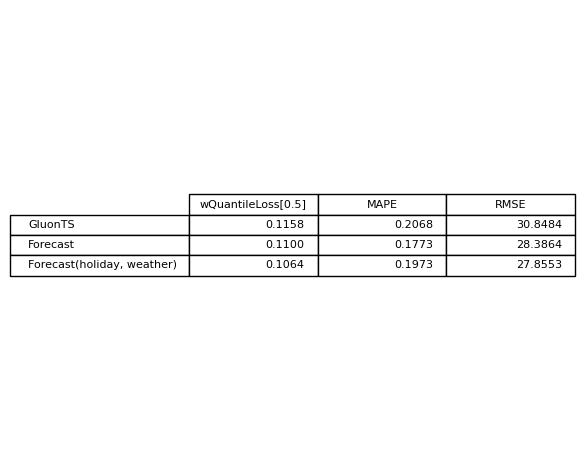

In [101]:
col_label = ["wQuantileLoss[0.5]", "MAPE", "RMSE"]
row_label = ["GluonTS", "Forecast", "Forecast(holiday, weather)"]

cell_text = [["0.1158", "0.2068", "30.8484"], 
             ["0.1100", "0.1773", "28.3864"],
             ["0.1064", "0.1973", "27.8553"]]

fig, ax = plt.subplots()
ax.axis("off")
ax.axis('tight')
ax.table(cellText=cell_text, rowLabels=row_label, colLabels=col_label, loc='center')
fig.tight_layout()
plt.show

In [102]:
import matplotlib.ticker as ticker

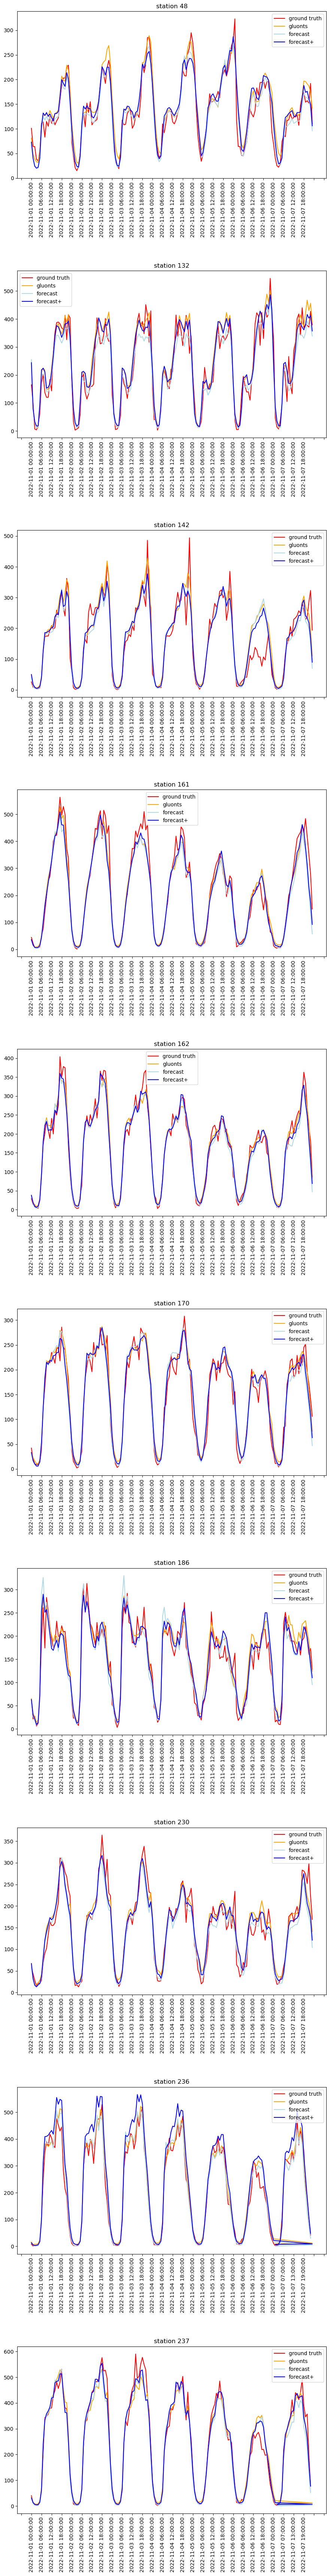

In [155]:
# test, gluonts, forecast, forecast_holy_weath
stations = forecast.columns.tolist()

n_plot = len(stations)
fig, axes = plt.subplots(n_plot, 1, figsize=(10, n_plot * 7))


for station, ax in zip(stations, axes):
    answer = test[test['item_id']==int(station)]

    ax.plot(answer.index, answer['target_value'], color='red', label='ground truth')
    ax.plot(gluonts.index, gluonts[station].round(0), color='orange', label='gluonts')
    ax.plot(forecast.index, forecast[station].round(0), color='lightblue', label='forecast')
    ax.plot(forecast_holy_weath.index, forecast_holy_weath[station].round(0), color='blue', label='forecast+')

    ax.yaxis.label.set(rotation='horizontal', ha='right')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
    ax.tick_params(axis='x', labelrotation=90)
    ax.legend()
    
    ax.set_title("station " + station)
    
fig.tight_layout(pad=5.0)    


In [ ]:
'''
To check about the glitch around 2022-11-07 03~04 in the graphs for station 236 and 237
'''

In [146]:
gluonts['237'].iloc[-36:]

2022-11-06 12:00:00    292.264500
2022-11-06 13:00:00    298.328000
2022-11-06 14:00:00    341.261350
2022-11-06 15:00:00    348.625730
2022-11-06 16:00:00    341.952800
2022-11-06 17:00:00    352.105260
2022-11-06 18:00:00    321.750370
2022-11-06 19:00:00    251.700970
2022-11-06 20:00:00    211.637050
2022-11-06 21:00:00    189.887010
2022-11-06 22:00:00    132.458360
2022-11-06 23:00:00     83.879780
2022-11-07 00:00:00     45.203033
2022-11-07 01:00:00     21.401897
2022-11-07 02:00:00     12.132724
2022-11-07 03:00:00     11.528386
2022-11-07 04:00:00     14.236856
2022-11-07 05:00:00     24.256704
2022-11-07 06:00:00     66.109240
2022-11-07 07:00:00    182.209900
2022-11-07 08:00:00    250.534160
2022-11-07 09:00:00    295.186220
2022-11-07 10:00:00    311.701750
2022-11-07 11:00:00    337.067230
2022-11-07 12:00:00    351.552760
2022-11-07 13:00:00    350.725100
2022-11-07 14:00:00    409.139370
2022-11-07 15:00:00    428.275800
2022-11-07 16:00:00    422.058840
2022-11-07 17:

In [145]:
gluonts['236'].iloc[-24:]

2022-11-07 00:00:00     27.998234
2022-11-07 01:00:00     12.125178
2022-11-07 02:00:00      9.123007
2022-11-07 03:00:00      8.575036
2022-11-07 04:00:00     12.773762
2022-11-07 05:00:00     26.233494
2022-11-07 06:00:00     86.097336
2022-11-07 07:00:00    218.801620
2022-11-07 08:00:00    313.102080
2022-11-07 09:00:00    322.635500
2022-11-07 10:00:00    327.627400
2022-11-07 11:00:00    343.313320
2022-11-07 12:00:00    354.865880
2022-11-07 13:00:00    341.889250
2022-11-07 14:00:00    379.130900
2022-11-07 15:00:00    429.382660
2022-11-07 16:00:00    410.091300
2022-11-07 17:00:00    443.968660
2022-11-07 18:00:00    413.565340
2022-11-07 19:00:00    316.181700
2022-11-07 20:00:00    240.041400
2022-11-07 21:00:00    170.297740
2022-11-07 22:00:00     99.898926
2022-11-07 23:00:00     45.770313
Name: 236, dtype: float64

### Conclusions

So far, we have trained a GluonTS model and two Amazon Forecast models. 

1. Amazon Forecast with addiontal data performed best in terms of weighted quantile loss, however, within a marginal gap such that if we change the metric to MAPE, Forecast without addtional data becomes best.
2. GluonTS perforamed still quite competitive especially considering its training time against Amazon Forecast's.
3. However, the ease of use for training and prediction is way better with Amazon Forecast as it's a service.

We dealt with a relatively small dataset. It will be interesting to see how each model performs with a much bigger data set.